B2 - Sensor 2

Group members: Kevin Huang (Screen Master), Trey Scheid (Slack Master), Vrisan Dubey (Contributor)

We explored our data to find there was sleep data from one person over multiple nights. Selecting the desired date we calculated how many intervals to remove and leave the data desired from 11pm to 6am. Lastly we created a data frame then graphed the hypnogram to show visually how long the person was in each state of sleep. We are now prepared to compare this sensor data to another to see which performed better in comparison to the gold standard. Assuming this sensor is mostly correct we can see already this person followed the normal sleep patterns with more deep sleep early in the night and more REM sleep later.

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

# let's import our file for the analysis:
json_file = './data/sensor2_sleep.json'

with open(json_file, 'r') as infile:
  json_data = json.load(infile)

In [2]:
# what is this file?
json_data

{'sleep': [{'dateOfSleep': '2020-01-17',
   'duration': 29460000,
   'efficiency': 96,
   'endTime': '2020-01-17T07:20:30.000',
   'infoCode': 0,
   'isMainSleep': True,
   'levels': {'data': [{'dateTime': '2020-01-16T23:09:30.000',
      'level': 'wake',
      'seconds': 570},
     {'dateTime': '2020-01-16T23:19:00.000',
      'level': 'light',
      'seconds': 1200},
     {'dateTime': '2020-01-16T23:39:00.000', 'level': 'deep', 'seconds': 1650},
     {'dateTime': '2020-01-17T00:06:30.000', 'level': 'light', 'seconds': 360},
     {'dateTime': '2020-01-17T00:12:30.000', 'level': 'rem', 'seconds': 300},
     {'dateTime': '2020-01-17T00:17:30.000',
      'level': 'light',
      'seconds': 1320},
     {'dateTime': '2020-01-17T00:39:30.000', 'level': 'deep', 'seconds': 1770},
     {'dateTime': '2020-01-17T01:09:00.000',
      'level': 'light',
      'seconds': 1920},
     {'dateTime': '2020-01-17T01:41:00.000', 'level': 'rem', 'seconds': 930},
     {'dateTime': '2020-01-17T01:56:30.000',
 

In [3]:
# let's see what elements do we have in the dictionary
for element in json_data:
  print(element)

sleep


json_data has one element with its key called 'sleep'

In [17]:
# we are interested in sleep! let's focus on that
type(json_data['sleep'])

list

The value of sleep is a list

In [5]:
# let's find the element related to the day of interest! do we have one element per day?

# 1. let's find how many days are there

# -- write your code --
list_data = list(json_data.values())[0]
list_data

[{'dateOfSleep': '2020-01-17',
  'duration': 29460000,
  'efficiency': 96,
  'endTime': '2020-01-17T07:20:30.000',
  'infoCode': 0,
  'isMainSleep': True,
  'levels': {'data': [{'dateTime': '2020-01-16T23:09:30.000',
     'level': 'wake',
     'seconds': 570},
    {'dateTime': '2020-01-16T23:19:00.000', 'level': 'light', 'seconds': 1200},
    {'dateTime': '2020-01-16T23:39:00.000', 'level': 'deep', 'seconds': 1650},
    {'dateTime': '2020-01-17T00:06:30.000', 'level': 'light', 'seconds': 360},
    {'dateTime': '2020-01-17T00:12:30.000', 'level': 'rem', 'seconds': 300},
    {'dateTime': '2020-01-17T00:17:30.000', 'level': 'light', 'seconds': 1320},
    {'dateTime': '2020-01-17T00:39:30.000', 'level': 'deep', 'seconds': 1770},
    {'dateTime': '2020-01-17T01:09:00.000', 'level': 'light', 'seconds': 1920},
    {'dateTime': '2020-01-17T01:41:00.000', 'level': 'rem', 'seconds': 930},
    {'dateTime': '2020-01-17T01:56:30.000', 'level': 'light', 'seconds': 1440},
    {'dateTime': '2020-01-17

In [6]:
days = len(list_data)
days

3

There's there days of sleep data in the file

In [7]:
# 2. let's find the index of the day of interest; for each day, let's print dateOfSleep , so we will know 
# which element to use (the night is between 15 and 16 of Jan 2020)

# -- write your code --
for item in list_data:
    for key, value in item.items():
        if key == 'dateOfSleep':
            print(value)

2020-01-17
2020-01-16
2020-01-15


The above are the three dates

In [8]:
# 3. let's find the time the participant went to bed
night_index = 1# put here the day you have chosen
json_data['sleep'][night_index]['startTime']
print('Night starts at: '+json_data['sleep'][night_index]['startTime'])
print('Night end at: '+json_data['sleep'][night_index]['endTime'])

Night starts at: 2020-01-15T22:34:00.000
Night end at: 2020-01-16T06:16:30.000


We chose 2020-01-16 as the day to investigate

In [9]:
# 4. total time in bed: put the total time spent in bed by the participant (calculate it manually)

# -- write your code --
time = 7 * 60 * 60 + 42 * 60 + 30
time

27750

The total time in bed is 27750s

In [10]:
# 5. let's extract the hypnogram !
# the code is written for you, but verify step by step what is happening (add comments)!

from datetime import datetime
import time

#'1' = deep (N3) sleep - '2' = light (N1 or N2) sleep - '3' = REM sleep - '4' = awake
dic_sleep = {'wake':4 , 'deep':1, 'light':2 , 'rem':3}

n_sleep_logs = len(json_data['sleep'][night_index]['levels']['data'])

# total n of intervals (30 min each)
total_n_intervals = 7*60*2 + (26+16)*2 +1

# array of sleep status: from 11pm to 6am (420 minutes)
hypno = np.zeros(total_n_intervals)

time_start = datetime.strptime('2020-01-15T22:34:00.000', '%Y-%m-%dT%H:%M:%S.%f')

current_sample = 0
for ind in range(n_sleep_logs):
  n_samples_sleep_log = int(json_data['sleep'][night_index]['levels']['data'][ind]['seconds']/30)
  sleep_recorded = json_data['sleep'][night_index]['levels']['data'][ind]['level']
  hypno[current_sample:current_sample+n_samples_sleep_log] = dic_sleep[sleep_recorded]
  current_sample = current_sample+n_samples_sleep_log

In [11]:
# 6. let's verify hypnogram is the right length
len(hypno)

925

In [12]:
# 7. let's write down the hypnogram to export,
# we need to write the phase of sleep (from 1 to 4) from 11:00pm to 6:00am , with sleep phase for each 30 seconds
total_number_30sec_int = 7*60*2

df = pd.DataFrame(columns = ['IndexTime','SleepPhase'])
df['IndexTime'] = range(total_number_30sec_int)

# let's cut the first and last 30-sec-intervals of hypno (outside the range of interest)
intervals_before_11pm = 53# -- calculate it manually (how many 30 sec intervals should we cut?)
intervals_after_6am = 32# -- calculate it manually (how many 30 sec intervals should we cut?)

# let's cut the first and last values of hypno (outside the range of interest)
df['SleepPhase'] = hypno[intervals_before_11pm:-(intervals_after_6am)]

In [13]:
# 8. let's save the final csv file
df.to_csv('sensor_2_output.csv', index=False)

In [14]:
# 9. let's calculate amount of sleep per phase
# in number of intervals
# in percentage over the 7 hours of analysis

# -- write your code --
df = df.groupby('SleepPhase').count()
df.IndexTime = df.IndexTime / 840
df

,IndexTime
SleepPhase,
1.0,0.078571
2.0,0.678571
3.0,0.158333
4.0,0.084524


We got the percentage of time for each SleepPhase for the original data frame

In [15]:
# 10. let's print the hypnogram! 

def plot_hypno(signal): #,color
  x = np.arange(len(signal))
  y = signal
  
  fontsizeV = 12
  mpl.plot(x,y) #color=color
  mpl.xlabel('Time (30sec intervals)',fontsize=fontsizeV)
  mpl.ylabel('Sleep phase',fontsize=fontsizeV)
  mpl.yticks([1,2,3,4])
  mpl.title('1=deep(N3), 2=light(N1=N2), 3=REM, 4=awake')
  mpl.grid(True)
  mpl.tight_layout()
  
# -- write your code --

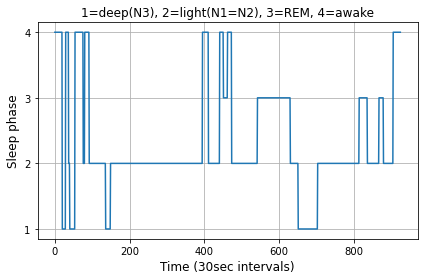

In [16]:
plot_hypno(hypno)